## Data Science Bootcamp
### Project 2 : To predict the occurance of stroke
#### By Ahmad Wahid

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from scipy.stats import chi2_contingency
%matplotlib inline

In [2]:
# Importing the data set
data_set=pd.read_csv('Project2.csv')
data=data_set.copy()
data_set

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


##### 1)   To visualize Age and BMI

In [3]:
avg=data_set.bmi.mean()
data_set['bmi'].fillna(avg,inplace=True)

In [4]:
age_bmi=data_set.groupby('age',as_index=False)['bmi'].count()
age_bmi

,age,bmi
0,0.08,2
1,0.16,3
2,0.24,5
3,0.32,5
4,0.40,2
...,...,...
99,78.00,102
100,79.00,85
101,80.00,70
102,81.00,60


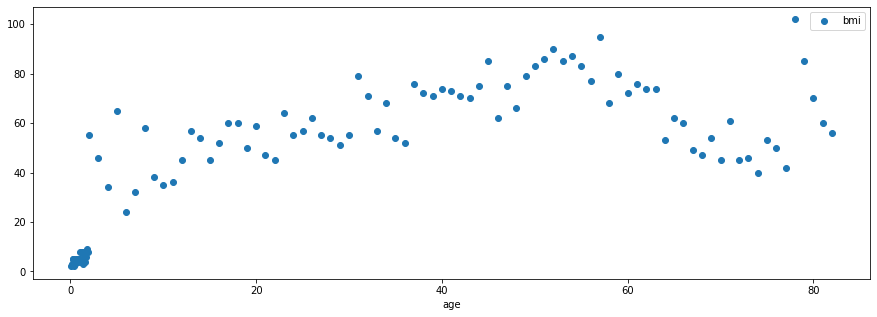

In [34]:
age_bmi.plot(x='age',y='bmi',style='o',figsize=(15,5))
plt.show()

# ----------------------------------------------------------------------------------------------------------

## 2) To find Correlation Between Age and Gender

In [6]:
Le= LabelEncoder()
data_set['gender_code']=Le.fit_transform(data_set.gender)
data_set

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_code
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,1


In [7]:
corr_age_gender=data_set.loc[:,['age','gender_code']]
corr_age_gender.corr()

,age,gender_code
age,1.000000,-0.028202
gender_code,-0.028202,1.000000


# ----------------------------------------------------------------------------------------------------------

## 3) To find correlation between Hypertension and Glucose Level

In [8]:
correlation_hyper_glucose=data_set.loc[:,['hypertension','avg_glucose_level']]
correlation_hyper_glucose.corr()

,hypertension,avg_glucose_level
hypertension,1.000000,0.174474
avg_glucose_level,0.174474,1.000000


In [9]:
data_set.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_code
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388,0.002511
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257,-0.028202
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904,0.020994
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914,0.085447
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945,0.055180
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947,-0.026109
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000,0.008929
gender_code,0.002511,-0.028202,0.020994,0.085447,0.055180,-0.026109,0.008929,1.000000


<AxesSubplot:>

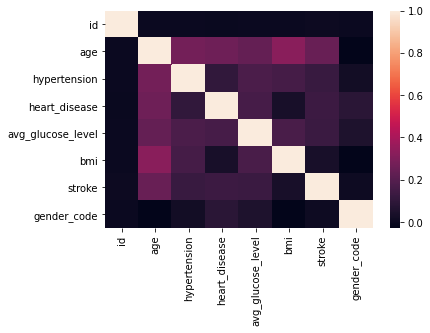

In [10]:
sns.heatmap(data_set.corr())

# ----------------------------------------------------------------------------------------------------------

## 4) To find correlation between Marital Status and Smoking Status

In [11]:
Le= LabelEncoder()
data_set['marital_code']=Le.fit_transform(data_set.ever_married)
data_set['smoking_code']=Le.fit_transform(data_set.smoking_status)
data_set

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_code,marital_code,smoking_code
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,1,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,0,1,2
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,1,1,2
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0,1,3
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,0,1,2
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,0,1,2
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,0,1,2
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,1,1,1


In [12]:
corr_marriage_smoking=data_set.loc[:,['marital_code','smoking_code']]
corr_marriage_smoking.corr()

,marital_code,smoking_code
marital_code,1.000000,0.259647
smoking_code,0.259647,1.000000


# ---------------------------------------------------------------------------------------------------------

## 5)  Find if there is any relation between work type and heart disease 

In [13]:
chi2_contingency(pd.crosstab(data_set.work_type,data_set.heart_disease))

(70.70250971460098,
 1.613111898301022e-14,
 4,
 array([[6.21514286e+02, 3.54857143e+01],
        [2.08117417e+01, 1.18825832e+00],
        [2.76701566e+03, 1.57984344e+02],
        [7.74764384e+02, 4.42356164e+01],
        [6.49893933e+02, 3.71060665e+01]]))

###### From the above output it's clear that the second value  is p which is much smaller than 0.05. So it means 
###### there is no relation between work type and heart disease

# ----------------------------------------------------------------------------------------------------------

## 6) Find the frequency of Smoking status in the form of Histogram

In [14]:
smoking_info=data_set.loc[:,'smoking_status'].value_counts().reset_index(drop=False)
smoking_info

,index,smoking_status
0,never smoked,1892
1,Unknown,1544
2,formerly smoked,885
3,smokes,789


<AxesSubplot:ylabel='Frequency'>

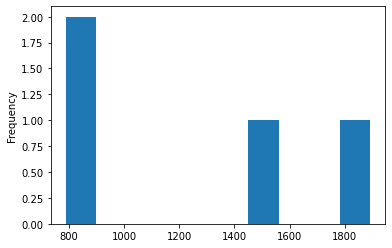

In [15]:
data_set['smoking_status'].value_counts().plot.hist()

# ---------------------------------------------------------------------------------------------------------

## 7) What is Min, Max and Avg glucose level

In [16]:
avg_glucose=np.mean(data_set['avg_glucose_level']) ## Average of the avg_glucose_level
min_glucose=np.min(data_set['avg_glucose_level'])  ## Minimum value of the avg_glucose_level
max_glucose=np.max(data_set.avg_glucose_level)     ## Maximum value of the avg_glucose_level
print('Average Value of the avg_glucose_level = {}'.format(avg_glucose))
print('Minimum value of the avg_glucose_level = {}'.format(min_glucose))
print('Maximum value of the avg_glucose_level = {}'.format(max_glucose))

Average Value of the avg_glucose_level = 106.1476771037182
Minimum value of the avg_glucose_level = 55.12
Maximum value of the avg_glucose_level = 271.74


# ----------------------------------------------------------------------------------------------------------

## 8) Find the frequency of Males and females in the data

In [17]:
gender_type=data_set.loc[:,'gender'].value_counts().reset_index(drop=False)
gender_type

,index,gender
0,Female,2994
1,Male,2115
2,Other,1


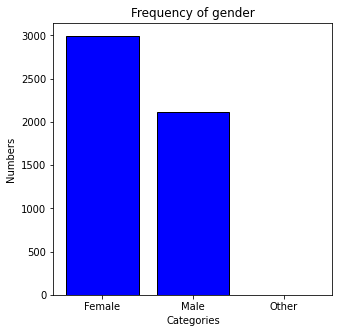

<Figure size 432x288 with 0 Axes>

In [18]:
fig,ax=plt.subplots(figsize=(5,5))
def gend(ax):
    ax.bar(gender_type['index'],gender_type.gender,color='blue',edgecolor='black')
    ax.set_title(label='Frequency of gender')
    ax.set_xlabel('Categories')
    ax.set_ylabel('Numbers ')
    plt.show()
gend(ax)
plt.tight_layout()
    

## -----------------------------------------------------------------------------------------------------

## Applying Logistic Regression to predict the outcome

In [19]:
# importing libraries for Logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [20]:
data=data_set.copy() ## making a copy of the data set to use it without touching the main data set
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_code,marital_code,smoking_code
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,1,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,0,1,2
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,1,1,2
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0,1,3
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0,1,2


In [21]:
# Creating Dummy values for the respective features to use in prediction
work_code=pd.get_dummies(data.work_type)
smoking_code=pd.get_dummies(data.smoking_status)
residence_type=pd.get_dummies(data.Residence_type)

# Droping the unnecessary features having 
data=data.drop(['id','gender','ever_married','work_type','Residence_type','smoking_status','smoking_code'],axis=1)
data=pd.concat([data,residence_type,work_code,smoking_code],axis=1)

In [22]:
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_code,marital_code,Rural,Urban,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.600000,1,1,1,0,1,0,0,1,0,0,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,1,1,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,1,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,1,0,1,0,0,1,0,0,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,1,1,0,0,0,0,1,0,0,0,1,0


In [23]:
X=data.drop('stroke',axis=1)   # Independent features
y=data['stroke']               # the target values

In [24]:

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=0.3,
                                              random_state=1)

In [25]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)    # Training the model

C:\Users\Ahmad\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
predictions=logmodel.predict(X_test)  # Making predictions based on the X_test

In [27]:
classification_report(y_test,predictions)

C:\Users\Ahmad\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ahmad\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ahmad\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.95      1.00      0.97      1450\n           1       0.00      0.00      0.00        83\n\n    accuracy                           0.95      1533\n   macro avg       0.47      0.50      0.49      1533\nweighted avg       0.89      0.95      0.92      1533\n'

In [28]:
confusion_matrix(y_test,predictions)

array([[1450,    0],
       [  83,    0]], dtype=int64)

In [29]:
accuracy_score(y_test,predictions)*100    # The Accuracy

94.58577951728635

In [30]:
df=pd.DataFrame({'Actual':y_test,'Predicted': predictions})
df.value_counts()


Actual  Predicted
0       0            1450
1       0              83
dtype: int64

As the numbers of zeros are more so it means we have less number of strokes. So the predicted output will be more focused on 0.

In [31]:
own_pred=logmodel.predict([[70.0,1,1,50.00,100.0000,1,0,1,1,1,1,1,1,1,1,1,1,1]])  
print('My own prediction of the stroke = {} '.format(own_pred[0]))

My own prediction of the stroke = 0 


# --------------------------------------------------------------------------------------------------

## What is the most prominent and relevant factor causing the stroke?

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func=chi2, k=1)
fit = test.fit(X, y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[3.635e+03 7.545e+01 8.799e+01 1.718e+03 1.589e+01 2.390e-01 2.062e+01
 6.203e-01 6.007e-01 3.190e-02 1.127e+00 3.088e-01 1.658e+01 3.111e+01
 1.114e+01 1.761e+01 5.485e-02 3.453e-01]
[[67.]
 [61.]
 [80.]
 [49.]
 [79.]]


###### The output clearly shows that age has most prominently effect  to cause stroke.